In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from google.colab import drive
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
width=256
height=256
depth=3

In [ ]:
directory_root = '/content/drive/My Drive/PlantDataset/PlantVillage/'

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir:
        # remove .DS_Store from list
        if directory == ".DS_Store":
            root_dir.remove(directory)

    for plant_folder in root_dir:
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list:


[INFO] Loading images ...
[INFO] Image loading completed
[ERROR] No images or labels were loaded.


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelBinarizer
import pickle

# Initialize lists to store image data and labels
image_list = []
label_list = []

# Specify the base directory
image_dir = '/content/drive/My Drive/PlantDataset/PlantVillage/'

# Supported image extensions
image_extensions = ['.jpg', '.jpeg', '.png', '.JPG']

try:
    # Loop through directories and files
    for label in os.listdir(image_dir):
        label_path = os.path.join(image_dir, label)
        if os.path.isdir(label_path):  # Check if it's a directory
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                if os.path.isfile(img_path) and any(img_name.endswith(ext) for ext in image_extensions):  # Check if it's an image
                    try:
                        # Load and process the image
                        img = load_img(img_path, target_size=(64, 64))  # Resize to a fixed size
                        img_array = img_to_array(img)
                        image_list.append(img_array)
                        label_list.append(label)
                    except Exception as e:
                        print(f"Error loading {img_path}: {e}")

    # Check if the lists are populated correctly
    print(f"Number of images: {len(image_list)}")
    print(f"Number of labels: {len(label_list)}")

    # If lists are empty, raise an error
    if len(label_list) == 0:
        raise ValueError("Label list is empty. Check if image files and directories are being read correctly.")

    # Convert lists to numpy arrays
    np_image_list = np.array(image_list, dtype=np.float16) / 255.0
    label_binarizer = LabelBinarizer()
    image_labels = label_binarizer.fit_transform(label_list)

    # Save the label binarizer for later use
    pickle.dump(label_binarizer, open('label_transform.pkl', 'wb'))

    n_classes = len(label_binarizer.classes_)

    # Print the classes
    print("Classes: ", label_binarizer.classes_)

except Exception as e:
    print(f"Error: {e}")


Number of images: 18504
Number of labels: 18504
Classes:  ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state=42)

In [ ]:
# Data augmentation

aug = ImageDataGenerator(
    rotation_range=30,  # Increase rotation
    width_shift_range=0.2,  # Increase shift ranges
    height_shift_range=0.2,
    shear_range=0.3,  # Increase shear
    zoom_range=0.3,  # Increase zoom
    horizontal_flip=True,
    fill_mode="nearest")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Initialize the Sequential model
model = Sequential()

# Define the input shape
inputShape = (64, 64, 3)  # Assuming images are resized to 64x64x3
chanDim = -1

# Add the Input layer
model.add(Input(shape=inputShape))

# Add the layers
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(2048))  # Match the flattened size here
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(n_classes))
model.add(Activation("softmax"))

# Compile the model
opt = Adam(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
print("[INFO] Training network...")

history = model.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
)

[INFO] Training network...
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


462/462 ━━━━━━━━━━━━━━━━━━━━ 301s 633ms/step - accuracy: 0.5313 - loss: 1.7677 - val_accuracy: 0.3812 - val_loss: 3.9733
Epoch 2/25
  1/462 ━━━━━━━━━━━━━━━━━━━━ 3:54 508ms/step - accuracy: 0.7188 - loss: 0.8514

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


462/462 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.7188 - loss: 0.8514 - val_accuracy: 0.3748 - val_loss: 4.0271
Epoch 3/25
462/462 ━━━━━━━━━━━━━━━━━━━━ 300s 617ms/step - accuracy: 0.7297 - loss: 0.8457 - val_accuracy: 0.5882 - val_loss: 2.6239
Epoch 4/25
462/462 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.7500 - loss: 0.9532 - val_accuracy: 0.5866 - val_loss: 2.4657
Epoch 5/25
462/462 ━━━━━━━━━━━━━━━━━━━━ 311s 620ms/step - accuracy: 0.7806 - loss: 0.6984 - val_accuracy: 0.6571 - val_loss: 1.5637
Epoch 6/25
462/462 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.7812 - loss: 0.5798 - val_accuracy: 0.6612 - val_loss: 1.4969
Epoch 7/25
462/462 ━━━━━━━━━━━━━━━━━━━━ 294s 606ms/step - accuracy: 0.8062 - loss: 0.6138 - val_accuracy: 0.7201 - val_loss: 0.9756
Epoch 8/25
462/462 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.8125 - loss: 0.4933 - val_accuracy: 0.7120 - val_loss: 1.0497
Epoch 9/25
462/462 ━━━━━━━━━━━━━━━━━━━━ 280s 604ms/step - accuracy: 0.8398 - loss: 0.4792 - val

In [ ]:

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


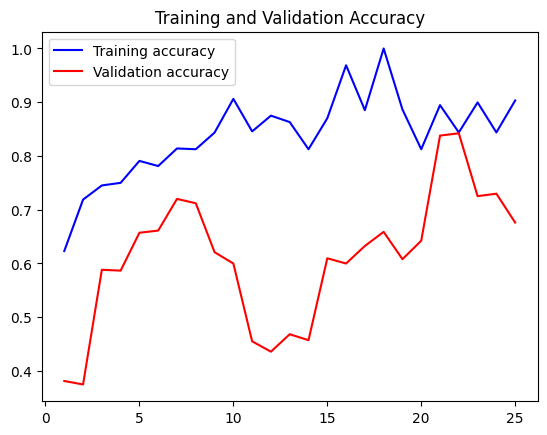

In [ ]:
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

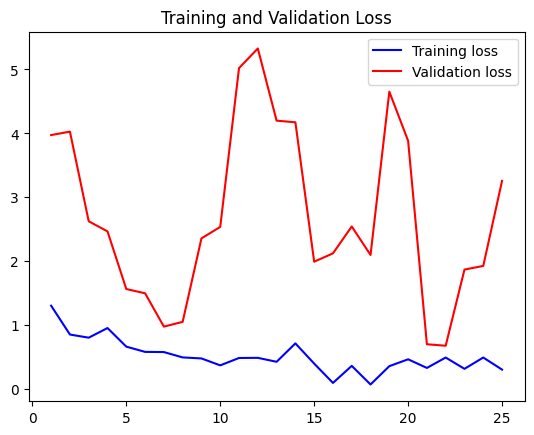

In [ ]:
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")


[INFO] Calculating model accuracy
116/116 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.6713 - loss: 3.3229
Test Accuracy: 67.60%


In [ ]:
# Save the model
print("[INFO] Saving model...")
model.save('plant_disease_model.h5')
pickle.dump(model, open('cnn_model.pkl','wb'))

[INFO] Saving model...
